/Users/marinka2014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


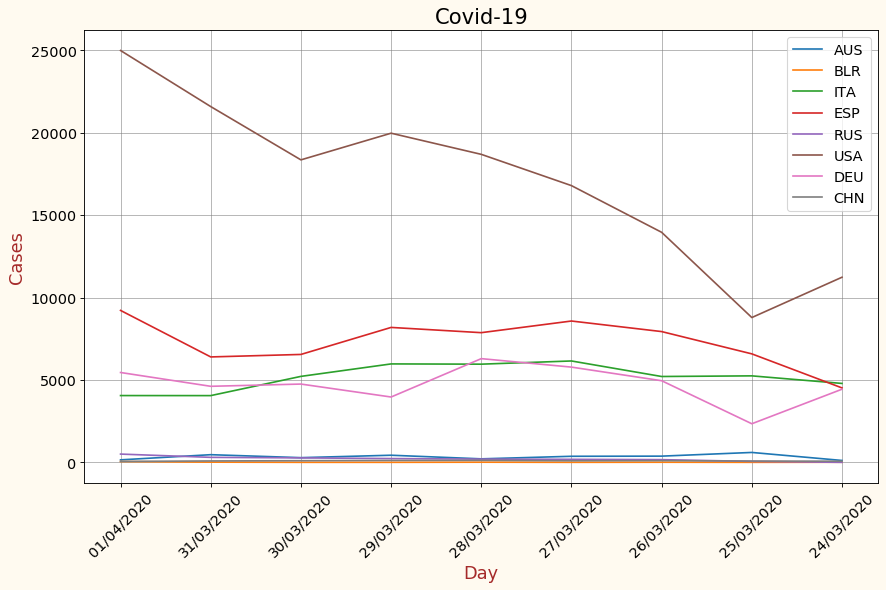

In [547]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

data={}
with open("/Users/marinka2014/Desktop/Работа/task_1/data.json", "r") as read_file:
    records = json.load(read_file)['records']
country = ''
cases= []
for block in records:
    if country == block['countryterritoryCode']:
        cases.append(int(block['cases']))
    else:
        if country != '': data[country] = cases
        country = block['countryterritoryCode']
        cases=[]
        cases.append(int(block['cases']))
        
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1024 / dpi, 600 / dpi) )
mpl.rcParams.update({'font.size': 13})

dates=['01/04/2020', '31/03/2020','30/03/2020','29/03/2020','28/03/2020','27/03/2020','26/03/2020','25/03/2020','24/03/2020']
for reg in data:
    plt.plot(dates, data[reg], linestyle = 'solid', label=reg)

plt.xticks(rotation = 45)
plt.title('Covid-19', fontsize=19)
plt.xlabel('Day', fontsize=16, color='brown')
plt.ylabel('Cases', fontsize=16, color='brown')
plt.legend(loc='upper right')
ax = plt.axes()
ax.grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
ax.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.set_facecolor('floralwhite')
plt.savefig('first')

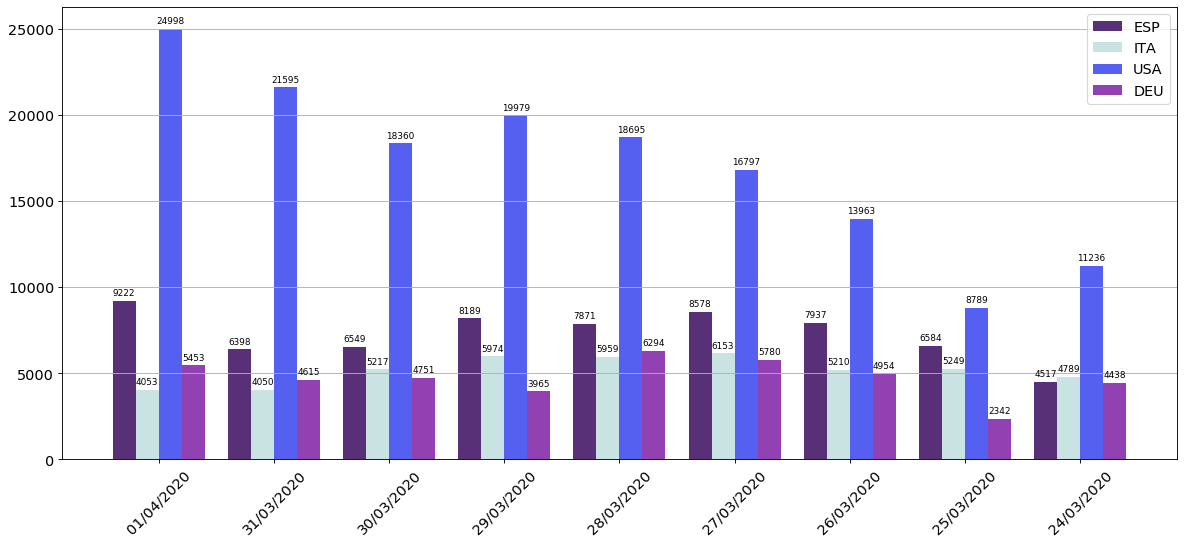

In [546]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


data={}
with open("/Users/marinka2014/Desktop/Работа/task_1/data.json", "r") as read_file:
    records = json.load(read_file)['records']
country = ''
cases= []
for block in records:
    if country == block['countryterritoryCode']:
        cases.append(int(block['cases']))
    else:
        if country != '': 
            data[country] = cases
        country = block['countryterritoryCode']
        cases=[]
        cases.append(int(block['cases']))

dates=['01/04/2020', '31/03/2020','30/03/2020','29/03/2020','28/03/2020','27/03/2020','26/03/2020','25/03/2020','24/03/2020']

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 560 / dpi) )
mpl.rcParams.update({'font.size': 13})

countryArray = ['ESP', 'ITA', 'USA', 'DEU']
locs = np.arange(1, len(dates)+1)
width = 0.2

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

mas=[] 
for i in range(4):
    color_rectangle = np.random.rand(1, 3)
    mas.append(ax.bar(locs + i * width, data[countryArray[i]], width=width, label=countryArray[i], color=color_rectangle))

plt.xticks(locs + width*1.5, dates, rotation = 45)
plt.legend(loc='upper right')

for rects in mas:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', size='8')

fig.tight_layout()
plt.savefig('second')

<Figure size 576x936 with 0 Axes>

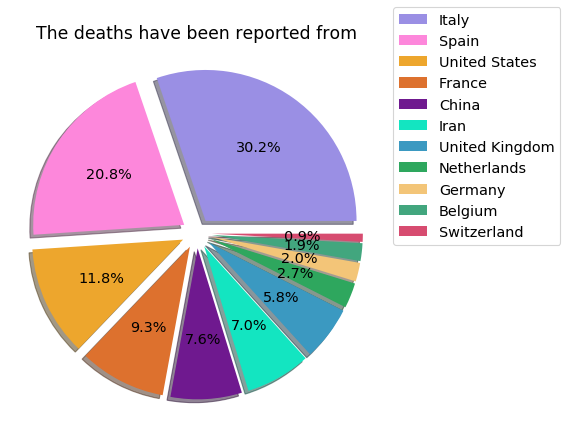

In [540]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

resp = urlopen('https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases') # скачиваем файл
html = resp.read().decode('utf8') 
soup = BeautifulSoup(html, 'html.parser')
data_x = [];data_y = []

for tag in soup.find_all('p'):
     if tag.contents[0].string == 'The deaths have been reported from': break
lst = [i for i in re.split(r'\W+', tag.contents[1]) if i]

country = '';num = 0
for i in lst:
    if i.isdigit():
        if num == 0: num = int(i)
        else: num = int(str(num) + i)  
    else: 
        if num != 0: 
            data_x.append(num)
            data_y.append(country)
            num = 0;country = ''
        country += i if country == '' else ' ' + i
    if len(data_x) > 10: break
plt.figure(figsize=(8,13))

plt.figure(dpi = dpi, figsize = (800 / dpi, 500 / dpi) )

explode = [0.1] * len(data_x)
color_rectangle = np.random.rand(11, 3)
plt.pie(data_x, explode = explode, autopct = '%1.1f%%', shadow=True, colors = color_rectangle)
plt.legend(
    bbox_to_anchor = (1, 0.45, 0.25, 0.25),
    loc = 'lower left', labels = data_y)
plt.title('The deaths have been reported from')
plt.savefig('third')